# <font color = 'red'> 1.1 python 基本操作 </font>

    本小节演示通过 python 实现最基本的功能，包括导入模块、基本的数据类型、作图等。

In [ ]:
"""
此处进行多行注释
随机行走模型，从 (0,0) 点处出发，任意方向随机前进 1 个步长
"""

import numpy as np
import random
import matplotlib.pylab as pl

nstep = input("请输入游走步数：")
nstep = int(nstep)
print("游走步数为：", nstep)

if nstep > 10000:
    print("步数太多")
    exit()
elif nstep < 10:
    print("步数太少")
    exit()
    
xlist = []
ylist = []
x = 0
y = 0

xlist.append(x)
ylist.append(y)

for ii in range(nstep):
    dx = 2*random.random() - 1    # random.random() 随机生成 (0,1) 之间的数，左式是为了使生成的数随机落入 (-1,1) 之间
    dy = 2*random.random() - 1
    dr = np.sqrt(dx**2 + dy**2)
    x = x + dx/dr
    y = y + dy/dr
    
    xlist.append(x)
    ylist.append(y)
     
pl.plot(xlist, ylist, 'r-', lw = 1)    # 作图
pl.xlabel('x-axis')
pl.ylabel('y-axis')
pl.show()

# <font color = 'red'> 1.2 python 文档读写</font>

    本小节演示通过 python 的 open 函数()实现文档的读写功能。

In [ ]:
import numpy as np
import random

f = open("Data/随机游走数据.dat",'w')       # 本无此文件，则新创建之，注意：若上级文件夹不存在，则会报错，需要新建上级文件夹
                                            # 如不指明上级文件夹，则在此目录下新建此文件

nstep = input("请输入游走步数：")
nstep = int(nstep)
print("游走步数为：", nstep)

if nstep > 10000:
    print("步数太多")
    exit()
elif nstep < 10:
    print("步数太少")
    exit()
    
xlist = []
ylist = []
x = 0
y = 0



for ii in range(nstep):
    dx = 2*random.random() - 1    # random.random() 随机生成 (0,1) 之间的数，左式是为了使生成的数随机落入 (-1,1) 之间
    dy = 2*random.random() - 1
    dr = np.sqrt(dx**2 + dy**2)
    x = x + dx/dr
    y = y + dy/dr
    xlist.append(x)
    ylist.append(y)
    f.write('%d\t%f\t%f\n' %(ii,x,y))   # 写入数据
    
f.close()     # 关闭文件
pl.plot(xlist, ylist, 'r-', lw = 1)
pl.xlabel('x-axis')
pl.ylabel('y-axis')
pl.show()

    下面演示打开已存在的文件并读出数据作图。

In [ ]:
import matplotlib.pyplot as pl

xlist = []
ylist = []

with open('Data/随机游走数据.dat','r') as f:  # 打开数据
    for lines in f:
        words = lines.split()
        xlist.append(float(words[1]))
        ylist.append(float(words[2]))
        
pl.plot(xlist, ylist, 'r-', lw = 1)
pl.xlabel('x-axis')
pl.ylabel('y-axis')
pl.show()

# <font color = 'red'> 1.3 布朗运动 </font>

均方位移：$MSD = \frac{1}{N} \Sigma_{i=1}^N |\pmb{r}_i(t_0+t) - \pmb{r}_i(t_0)|^2 = 6D_{\alpha}t$
    
<img src = "Images/1-随机游走.png" alt = "Drawing" style = "width:500px" align = "center">

In [18]:
import numpy as np
import random
import matplotlib.pyplot as pl
from scipy.optimize import leastsq

nwalker = 50000  # 50000 个样本
nstep = 100 # 每个样品行走 100 步

time = np.arange(nstep)
xr = np.zeros(nwalker)
yr = np.zeros(nwalker)
r = np.zeros(nwalker)
sum_walk = np.zeros(nstep)
y_fit = np.zeros(nstep)
p0 = np.zeros(2)

# 计算每个 walker 行走 100 步之后的 x 坐标和 y 坐标以及总的前进长度
# 记录所有 Walker 每一步前进的步长的平方和
for iwalker in range(nwalker):
    random.seed() # 每个人随机行走，故每个人都设置不同的种子
    x = 0
    y = 0
    r2 = 0
    for istep in range(nstep):
        sum_walk[istep] += r2
        theta = random.random()*2*np.pi
        dx = np.cos(theta)
        dy = np.sin(theta)
        x += dx
        y += dy
        r2 = x**2 + y**2
        
    xr[iwalker] = x
    yr[iwalker] = y
    r[iwalker] = np.sqrt(x**2 + y**2)

sum_walk = sum_walk/nwalker

xprob, xedge = np.histogram(xr, bins = 20, density = True)
yprob, yedge = np.histogram(yr, bins = 20, density = True)
rprob, redge = np.histogram(r, bins = 20, density = True)

xx = 0.5*(xedge[0:-1] + xedge[1:])
yy = 0.5*(yedge[0:-1] + yedge[1:])
rr = 0.5*(redge[0:-1] + redge[1:])

# --------------------------------------
def func(x, p):
    return p[0]*pow(x, p[1])

def residuals(p, y, x):
    return y - func(x, p)

# --------------------------------------
p0[0] = 1
p0[1] = 1
parameters = leastsq(residuals, p0, args = (time, sum_walk))
for ii in np.arange(nstep):
    y_fit[ii] = parameters[0][0]*pow(time[ii], parameters[0][1])

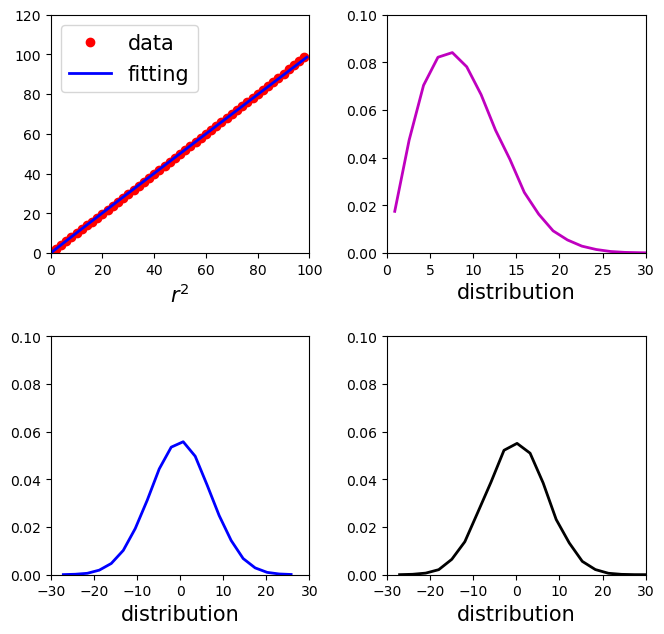

In [41]:
# -------------作图---------------------
fig = pl.figure(figsize = (7, 7))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

pl.subplots_adjust(left=0.1, bottom=0.1, top=0.9, right=0.95, \
                  hspace=0.35, wspace=0.3)

ax1.plot(time[::2], sum_walk[::2], 'ro', linestyle='none', \
        lw=1.8, label='data')
ax1.plot(time, y_fit, 'b-', lw=2, label='fitting')

ax2.plot(rr, rprob, 'm-', lw=2)
ax3.plot(xx, xprob, 'b-', lw=2)
ax4.plot(yy, yprob, 'k-', lw=2)

ax1.set_xlabel(r'time', fontsize=15)
ax1.set_xlabel(r'$r^2$', fontsize=15)
ax2.set_xlabel(r'r', fontsize=15)
ax2.set_xlabel(r'distribution', fontsize=15)
ax3.set_xlabel(r'x', fontsize=15)
ax3.set_xlabel(r'distribution', fontsize=15)
ax4.set_xlabel(r'y', fontsize=15)
ax4.set_xlabel(r'distribution', fontsize=15)

ax1.set_xlim(0,100)
ax1.set_ylim(0,120)
ax2.set_xlim(0,30)
ax2.set_ylim(0,0.1)
ax3.set_xlim(-30,30)
ax3.set_ylim(0,0.1)
ax4.set_xlim(-30,30)
ax4.set_ylim(0,0.1)
ax1.legend(loc='best', fontsize=15)
pl.show()